In [ ]:
import librosa
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

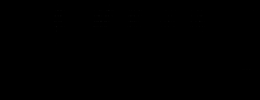

In [ ]:
y, sr = librosa.load("/content/metal_banging1.mp3", sr=None) #sr=None preserves sampling rate
n_fft = 2048 #%FFT points, adjust as you need
hop_length = 512 #%Sliding amount for windowed FFT (adjust as needed)
spec = librosa.feature.melspectrogram(y=y, sr=44100, n_fft=204, hop_length=512,n_mels=100, fmax=22000)
# spec_db = perform power to decibel (db) image transformation of `spec'
# decibel conversion → 10 log(
cv2_imshow(spec)

In [ ]:
'''
image_float = image.astype(np.float32)

    # Apply the power-to-decibel transformation
    # You can adjust the scaling factor as needed
db_image = 10 * np.log10(image_float + 1.0)

    # Normalize the pixel values to the [0, 255] range for display
db_image = cv2.normalize(db_image, None, 0, 255, cv2.NORM_MINMAX)

    # Convert the result back to uint8 (grayscale image format)
db_image = db_image.astype(np.uint8)

    # Display the original and transformed images (you may use plt.imshow for more control)
cv2_imshow(image)
'''

'\nimage_float = image.astype(np.float32)\n\n    # Apply the power-to-decibel transformation\n    # You can adjust the scaling factor as needed\ndb_image = 10 * np.log10(image_float + 1.0)\n\n    # Normalize the pixel values to the [0, 255] range for display\ndb_image = cv2.normalize(db_image, None, 0, 255, cv2.NORM_MINMAX)\n\n    # Convert the result back to uint8 (grayscale image format)\ndb_image = db_image.astype(np.uint8)\n\n    # Display the original and transformed images (you may use plt.imshow for more control)\ncv2_imshow(image)\n'

In [ ]:
log_mel_spectrogram = librosa.power_to_db(spec, ref=np.max)
#image=librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
# Normalize the spectrogram to the [0, 255] range
norm_spectrogram = cv2.normalize(log_mel_spectrogram, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 (grayscale image format)
spectrogram_image = norm_spectrogram.astype(np.uint8)

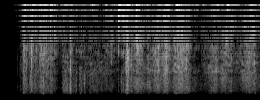

In [ ]:
cv2_imshow(spectrogram_image)

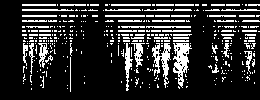

In [ ]:
(T, threshInv) = cv2.threshold(spectrogram_image, 100, 255,
cv2.THRESH_BINARY)
cv2_imshow(threshInv)

In [ ]:
import matplotlib.pyplot as plt
threshInv

array([[  0, 255,   0, 255, 255, 255],
       [  0, 255,   0, 255, 255, 255],
       [  0, 255,   0, 255, 255, 255],
       [  0, 255,   0, 255, 255, 255],
       [  0, 255,   0, 255, 255, 255],
       [  0, 255, 255, 255, 255, 255],
       [  0, 255, 255, 255, 255, 255],
       [  0, 255, 255, 255, 255, 255],
       [  0, 255, 255, 255, 255, 255],
       [  0, 255, 255, 255, 255, 255]], dtype=uint8)

In [ ]:
count=0
for i in range(threshInv.shape[0]):
  for j in range(threshInv.shape[1]):
    if threshInv[i][j]==255:
      count=count+1

In [ ]:
count

4005

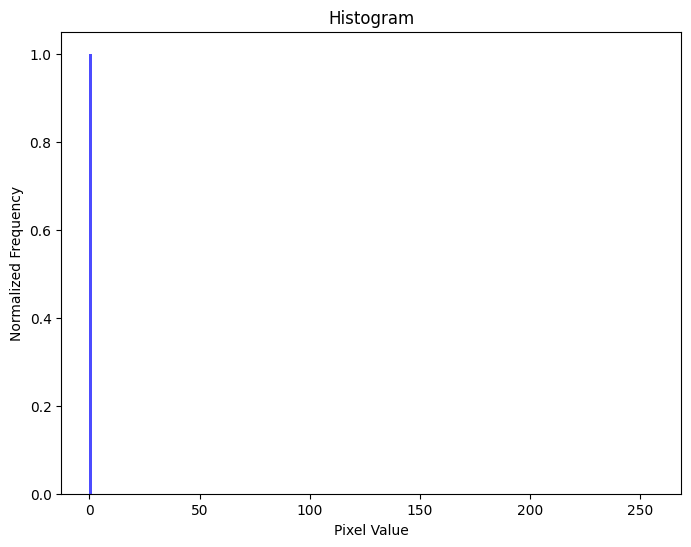

In [ ]:
#spectrogram1 = cv2.cvtColor(log_mel_spectrogram, cv2.COLOR_BGR2GRAY)
hist1 = cv2.calcHist([threshInv], [0], None, [256], [0, 256])
#cv2.normalize(hist1, hist1)
hist1
plt.figure(figsize=(8, 6))
hist_val, bin_edge, _ =plt.hist(hist1, bins=256, range=(0, 256), density=True, color='b', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.show()

In [ ]:
'''# Define the number of merged bins (25 bins in this case)
num_merged_bins = 25

# Calculate the number of 256 bins in each merged bin
bins_per_merged_bin = 256 // num_merged_bins

# Initialize an array to store frequencies for the merged bins
frequencies_merged_bins = np.zeros(num_merged_bins)

# Calculate the frequencies for the merged bins by summing the corresponding 256 bins
for i in range(num_merged_bins):
    start_bin = i * bins_per_merged_bin
    end_bin = (i + 1) * bins_per_merged_bin
    frequencies_merged_bins[i] = np.sum(hist1[start_bin:end_bin])'''

'# Define the number of merged bins (25 bins in this case)\nnum_merged_bins = 25\n\n# Calculate the number of 256 bins in each merged bin\nbins_per_merged_bin = 256 // num_merged_bins\n\n# Initialize an array to store frequencies for the merged bins\nfrequencies_merged_bins = np.zeros(num_merged_bins)\n\n# Calculate the frequencies for the merged bins by summing the corresponding 256 bins\nfor i in range(num_merged_bins):\n    start_bin = i * bins_per_merged_bin\n    end_bin = (i + 1) * bins_per_merged_bin\n    frequencies_merged_bins[i] = np.sum(hist1[start_bin:end_bin])'

In [ ]:
# Find the maximum value and its corresponding bin
max_value = np.max(hist_val)
max_bin = np.argmax(hist_val)

In [ ]:
max_bin

59

In [ ]:
if max_bin!=0 :
  print("good quality")
else :
  print("bad quality")

good quality


In [ ]:
fourier = cv2.dft(np.float32(spectrogram_image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

In [ ]:
np.median(hist1)

62.0